<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/MVP/Projeto_Split1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aluna : Lucia Helena Barros dos Santos

## Importando bibliotecas 

In [2]:
# importação brbliotecas necessárias
import pandas as pd
import os # para o retorno do caminho dos dados - 'os.chdir'
import datetime # para o tratamento de datas
import matplotlib.pyplot as plt # biblioteca para criação de gráficos
from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
from datetime import date, datetime # para conversão de datas

# ***1 - Etapa de Pré Processamento***


## 1.1 - Carregando do Banco de dados

In [3]:
# Apontando para My Drive
drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [4]:
# Importando o arqquivo em formato csv hospedado em My Drive
dadoarIR = pd.read_csv('dados/EstacaoIR20122021.csv', delimiter = ';')

In [5]:
# Verificando que o banco é um Dataframe
type(dadoarIR)

pandas.core.frame.DataFrame

In [6]:
# Verificando a estrutura do Datatrame observo que o atributo Data está em 
# formato str, necessitnado assim de um transformação de formato str para date
dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Identificacao  79863 non-null  int64  
 1   Data           79863 non-null  object 
 2   Estacao        79863 non-null  object 
 3   Chuva          79394 non-null  float64
 4   Pres           78617 non-null  float64
 5   RS             68397 non-null  float64
 6   Temp           69942 non-null  float64
 7   UR             63458 non-null  float64
 8   Dir_Vento      66399 non-null  float64
 9   Vel_Vento      66401 non-null  float64
 10  SO2            63167 non-null  float64
 11  NO2            73931 non-null  float64
 12  HCNM           67060 non-null  float64
 13  HCT            66986 non-null  float64
 14  CH4            67061 non-null  float64
 15  CO             72352 non-null  float64
 16  NO             73918 non-null  float64
 17  NOx            73927 non-null  float64
 18  O3    

In [7]:
# Observando as 5 primeiras linhas do Datafram
dadoarIR.head()

,Identificacao,Data,Estacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
0,223917,2012/01/01 00:30:00+00,IR,0.8,1003.43,0.83,24.84,97.12,NaN,NaN,...,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0
1,223918,2012/01/01 01:30:00+00,IR,0.0,1002.43,1.00,24.68,96.00,NaN,NaN,...,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0
2,223919,2012/01/01 02:30:00+00,IR,0.0,1001.62,1.00,24.56,96.39,NaN,NaN,...,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0
3,223920,2012/01/01 03:30:00+00,IR,0.0,1001.10,1.00,24.65,96.87,NaN,NaN,...,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0
4,223921,2012/01/01 04:30:00+00,IR,0.0,1000.85,1.00,24.66,96.32,NaN,NaN,...,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0


 
## 1.2 - Dicionário de dados:

##### --- Identificacao: Chave de identificação do registro no banco original
##### --- Data: Data e horário de medição do poluente pela estação
##### --- Estacao: Sigla da estação meteorológica Irajá (IR)

---

#### *Poluentes medidos pela Estação meteorológica IR*
##### --- Chuva: Volume de Chuva medida em milímetro (mm)
##### --- Pres: 
##### --- RS: Radiação Solar medida em milímetro (mm)
##### --- Temp: Temperatura medida em graus Celcius (°C)
##### --- UR: Umidade Relativa medida em percentual (%)
##### --- Dir_Vento: Direção do Vento medido em graus (°)
##### --- Vel_Vento: Umidade Relativa medida em percentual (%)
##### --- SO2: Dióxido de Exofre medido em Micrograma por Metro Cúbico (µg/m3) 
##### --- NO2: Dióxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### --- HCT: Hidrocarboneto Total medido em partes por milhão (ppm)
##### --- CH4: Metano medido em partes por milhão (ppm)
##### --- CO: Monóxido de Carbono Metano medido em partes por milhão (ppm)
##### --- NO: Monóxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### --- NOx: Óxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### --- O3: Ozônio medido Micrograma medido em Metro Cúbico (µg/m3) 
##### --- PM10: Material Particulado <10 medido em Metro Cúbico (µg/m3)
##### --- PM2_5: Material Particulado <2_5 medido em Metro Cúbico (µg/m3)


## 1.3 - Tratando o Banco de dados 

In [8]:
# Alterando o atributo Data de str para formato data
dadoarIR['Data'] = pd.to_datetime(dadoarIR['Data'])

In [9]:
# Confirmando que a transformação foi feita com sucesso 
# na variável Data de str para date
dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Identificacao  79863 non-null  int64              
 1   Data           79863 non-null  datetime64[ns, UTC]
 2   Estacao        79863 non-null  object             
 3   Chuva          79394 non-null  float64            
 4   Pres           78617 non-null  float64            
 5   RS             68397 non-null  float64            
 6   Temp           69942 non-null  float64            
 7   UR             63458 non-null  float64            
 8   Dir_Vento      66399 non-null  float64            
 9   Vel_Vento      66401 non-null  float64            
 10  SO2            63167 non-null  float64            
 11  NO2            73931 non-null  float64            
 12  HCNM           67060 non-null  float64            
 13  HCT            66986 non-null  float64        

In [10]:
# Verificação dos dados 
dadoarIR

,Identificacao,Data,Estacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
0,223917,2012-01-01 00:30:00+00:00,IR,0.8,1003.43,0.83,24.84,97.12,NaN,NaN,...,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0
1,223918,2012-01-01 01:30:00+00:00,IR,0.0,1002.43,1.00,24.68,96.00,NaN,NaN,...,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0
2,223919,2012-01-01 02:30:00+00:00,IR,0.0,1001.62,1.00,24.56,96.39,NaN,NaN,...,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0
3,223920,2012-01-01 03:30:00+00:00,IR,0.0,1001.10,1.00,24.65,96.87,NaN,NaN,...,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0
4,223921,2012-01-01 04:30:00+00:00,IR,0.0,1000.85,1.00,24.66,96.32,NaN,NaN,...,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79858,642173,2021-03-31 19:30:00+00:00,IR,0.0,1009.12,6.00,26.98,60.72,226.50,1.20,...,30.38,0.04,2.14,2.10,NaN,7.94,38.32,17.04,29.0,0.0
79859,642174,2021-03-31 20:30:00+00:00,IR,0.0,1009.95,6.17,26.82,60.65,227.17,1.25,...,28.38,0.02,2.08,2.05,NaN,6.71,35.09,18.76,28.0,2.0
79860,642175,2021-03-31 21:30:00+00:00,IR,0.0,1010.40,6.00,26.70,60.43,249.50,0.85,...,24.53,0.11,2.50,2.39,NaN,5.05,29.58,21.30,26.0,7.0
79861,642176,2021-03-31 22:30:00+00:00,IR,1.8,1010.33,6.00,25.80,71.95,299.17,1.15,...,28.75,0.03,2.09,2.06,NaN,4.19,32.94,17.11,30.0,11.0


In [ ]:
# Sumário estatístico para as variáveis numéricas
dadoarIR.describe()

,Identificacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
count,79863.000000,79394.000000,78617.000000,68397.000000,69942.000000,63458.000000,66399.000000,66401.000000,63167.000000,73931.000000,67060.000000,66986.000000,67061.000000,72352.000000,73918.000000,73927.000000,73722.000000,76108.000000,71421.000000
mean,359485.039618,0.134650,1015.435727,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.448970,18.413329,58.099434,35.123128,37.263661,17.317909
std,153056.361705,1.218307,4.985593,263.120389,4.865654,18.957895,82.200564,0.754830,6.849701,20.668641,0.129975,0.479669,0.399875,0.290624,34.183769,47.335670,33.879136,23.913806,14.699718
min,223917.000000,0.000000,998.800000,0.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243882.500000,0.000000,1011.970000,0.000000,23.880000,54.550000,83.500000,0.680000,0.580000,24.990000,0.060000,1.940000,1.860000,0.280000,3.220000,29.740000,9.150000,22.000000,8.000000
50%,263848.000000,0.000000,1015.070000,5.830000,26.750000,70.095000,150.830000,0.980000,2.510000,36.320000,0.100000,2.090000,1.980000,0.390000,7.140000,44.930000,26.320000,32.000000,13.000000
75%,503444.500000,0.000000,1018.670000,283.000000,30.370000,82.730000,226.830000,1.450000,5.150000,50.150000,0.160000,2.320000,2.170000,0.540000,17.840000,70.330000,50.490000,47.000000,23.000000
max,642177.000000,88.000000,1033.750000,1752.670000,45.650000,100.000000,358.830000,6.480000,309.130000,211.810000,7.530000,13.010000,12.730000,4.620000,640.380000,702.670000,355.450000,409.000000,370.000000


Analisando o sumário podemos verificar alguns poluentes com valores máximos muito distoantes de sua média e mediana, é o caso, da Chuva com média 0.13 e seu valor máximo de 88. 

Outros poluentes em destaque na comparação da média e valor máximo é o SO2 como média de 4.1 e valor máximo de 309.19. Estes podem representar um valor outlier, o que poderá ser confirmado com os gráficos de Box-plot.



In [19]:
# criando os campos ano, mês e dia que servirão de filtros
# Acessando os atributos da DAta
dadoarIR['Ano'] = dadoarIR['Data'].dt.year
dadoarIR['Mes'] = dadoarIR['Data'].dt.month
dadoarIR['Dia'] = dadoarIR['Data'].dt.day

In [20]:
# criando variáveis para identificar as estações climáticas
dadoarIR['Hora'] = dadoarIR['Data'].dt.hour
dadoarIR['Data'] = dadoarIR['Data'].dt.date

In [25]:
# o comando abaixo aumenta a quantidade de colunas visualizadas
pd.set_option('display.max_columns', None)
dadoarIR

,Identificacao,Data,Estacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5,Ano,Mes,Dia,Hora
0,223917,2012-01-01,IR,0.8,1003.43,0.83,24.84,97.12,NaN,NaN,2.55,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0,2012,1,1,0
1,223918,2012-01-01,IR,0.0,1002.43,1.00,24.68,96.00,NaN,NaN,0.45,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0,2012,1,1,1
2,223919,2012-01-01,IR,0.0,1001.62,1.00,24.56,96.39,NaN,NaN,0.11,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0,2012,1,1,2
3,223920,2012-01-01,IR,0.0,1001.10,1.00,24.65,96.87,NaN,NaN,0.70,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0,2012,1,1,3
4,223921,2012-01-01,IR,0.0,1000.85,1.00,24.66,96.32,NaN,NaN,0.79,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0,2012,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79858,642173,2021-03-31,IR,0.0,1009.12,6.00,26.98,60.72,226.50,1.20,11.11,30.38,0.04,2.14,2.10,NaN,7.94,38.32,17.04,29.0,0.0,2021,3,31,19
79859,642174,2021-03-31,IR,0.0,1009.95,6.17,26.82,60.65,227.17,1.25,12.12,28.38,0.02,2.08,2.05,NaN,6.71,35.09,18.76,28.0,2.0,2021,3,31,20
79860,642175,2021-03-31,IR,0.0,1010.40,6.00,26.70,60.43,249.50,0.85,11.12,24.53,0.11,2.50,2.39,NaN,5.05,29.58,21.30,26.0,7.0,2021,3,31,21
79861,642176,2021-03-31,IR,1.8,1010.33,6.00,25.80,71.95,299.17,1.15,11.26,28.75,0.03,2.09,2.06,NaN,4.19,32.94,17.11,30.0,11.0,2021,3,31,22


## Análise exploratória 


In [ ]:
# exibindo a quantidade de linhas por coluna
dadoarIR.groupby('Estacao').count()

,Identificacao,Data,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
Estacao,,,,,,,,,,,,,,,,,,,,
IR,79863,79863,79394,78617,68397,69942,63458,66399,66401,63167,73931,67060,66986,67061,72352,73918,73927,73722,76108,71421


In [ ]:
# exibindo um sumário estatístico
dadoarIR['Chuva'].describe()
dadoarIR['Pres'].describe()

count    78617.000000
mean      1015.435727
std          4.985593
min        998.800000
25%       1011.970000
50%       1015.070000
75%       1018.670000
max       1033.750000
Name: Pres, dtype: float64

In [ ]:
# exibindo a média de cada atributo, agrupado por Poluente
dadoarIR.groupby('Estacao').mean()

,Identificacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
Estacao,,,,,,,,,,,,,,,,,,,
IR,359485.039618,0.13465,1015.435727,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.44897,18.413329,58.099434,35.123128,37.263661,17.317909


## Gráficos

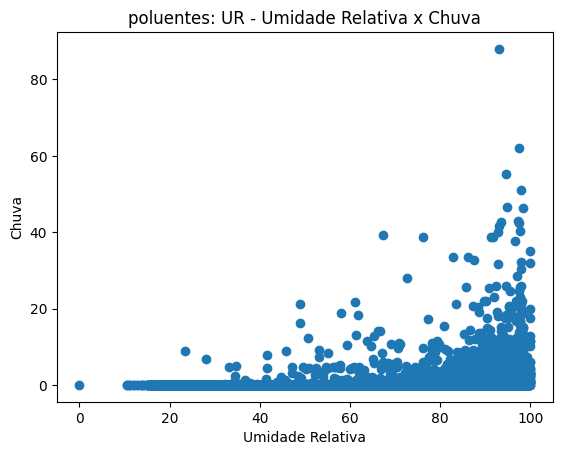

In [ ]:
# plotando o gráfico de Umidade Relativa x Chuva
plt.scatter(dadoarIR['UR'], dadoarIR['Chuva'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('poluentes: UR - Umidade Relativa x Chuva')
plt.xlabel('Umidade Relativa')
plt.ylabel('Chuva');